In [67]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [68]:
df = pd.read_csv("hotel_bookings 2.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


# Exploratory data analysis and Data cleaning

In [69]:
df.shape

(119390, 32)

In [70]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [72]:
df["reservation_status_date"]= pd.to_datetime(df["reservation_status_date"])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [74]:
df.describe(include= "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [75]:
for col in df.describe(include= "object").columns:
    print(col)
    print(df[col].unique())
    print("-----"*10)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [76]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [77]:
df.drop(["company", "agent"], axis = 1, inplace = True)
df.dropna(inplace = True)

In [78]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [79]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


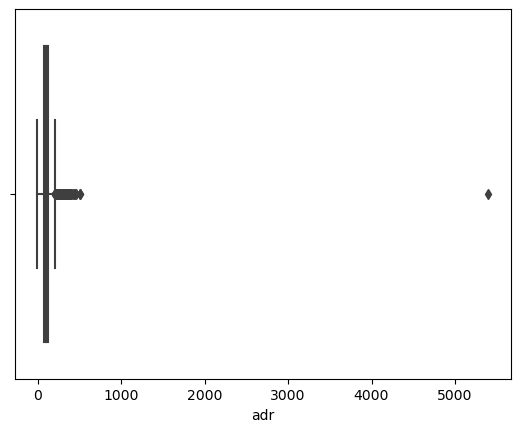

In [80]:
sns.boxplot(data = df, x = "adr"); #this is big outlier and need to remove this like really huge

In [81]:
df = df[df["adr"] < 5000]

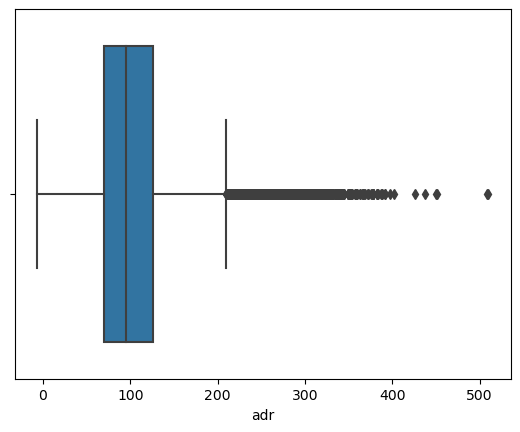

In [82]:
sns.boxplot(data = df, x = "adr"); #this is good now

### Data analysis and Visualizations

In [83]:
cancelled_per = df["is_canceled"].value_counts(normalize= True)
cancelled_per

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


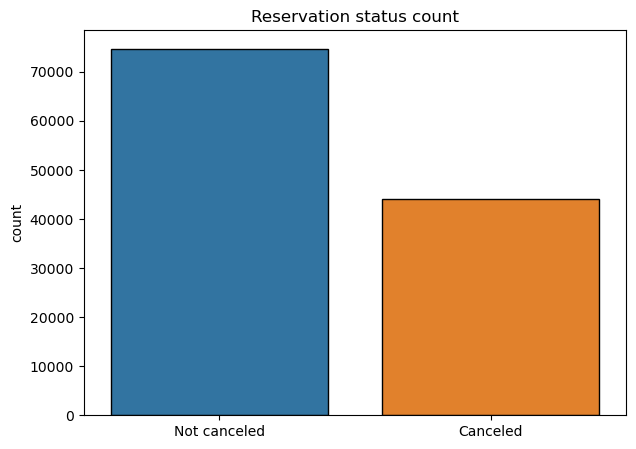

In [84]:
print(cancelled_per)
plt.figure(figsize = (7,5))
sns.countplot(data = df, x = "is_canceled", edgecolor = "k", width = 0.8)
plt.title("Reservation status count")
plt.xticks([0, 1], ["Not canceled", "Canceled"])
plt.xlabel("");

We and see there is a significant amout of people cancelling the hotel arount 37% people

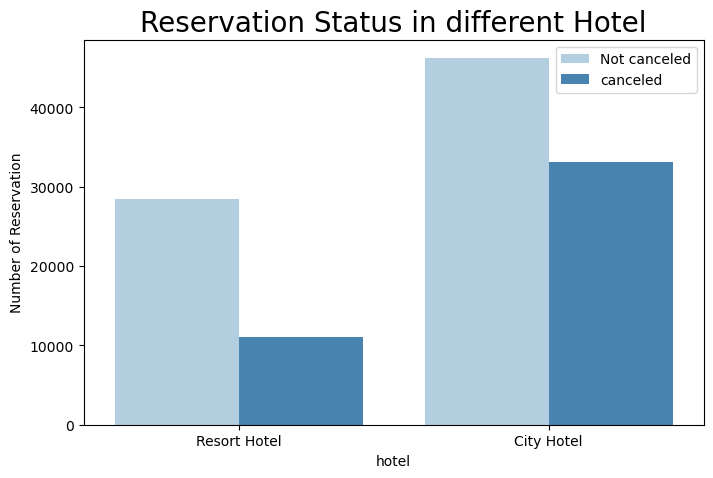

In [85]:
plt.figure(figsize = (8, 5))
sns.countplot(x = "hotel", hue = "is_canceled", data = df, palette = "Blues")
plt.title("Reservation Status in different Hotel", size = 20)
plt.ylabel("Number of Reservation")
plt.legend(["Not canceled", "canceled"]);

People are more cancelling in city hotel as compare to Resort Hotel 

In [86]:
resort_hotel = df[df["hotel"] == "Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize = True)*100

0    72.024952
1    27.975048
Name: is_canceled, dtype: float64

in resort hotel there are 27% people who cancel the resort hotel 

In [87]:
city_hotel = df[df["hotel"] == "City Hotel"]
city_hotel["is_canceled"].value_counts(normalize = True)*100

0    58.291825
1    41.708175
Name: is_canceled, dtype: float64

around 41% people are cancel the city hotel 

**is there any price affect?**

In [88]:
resort_hotel = resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel = city_hotel.groupby("reservation_status_date")[["adr"]].mean()

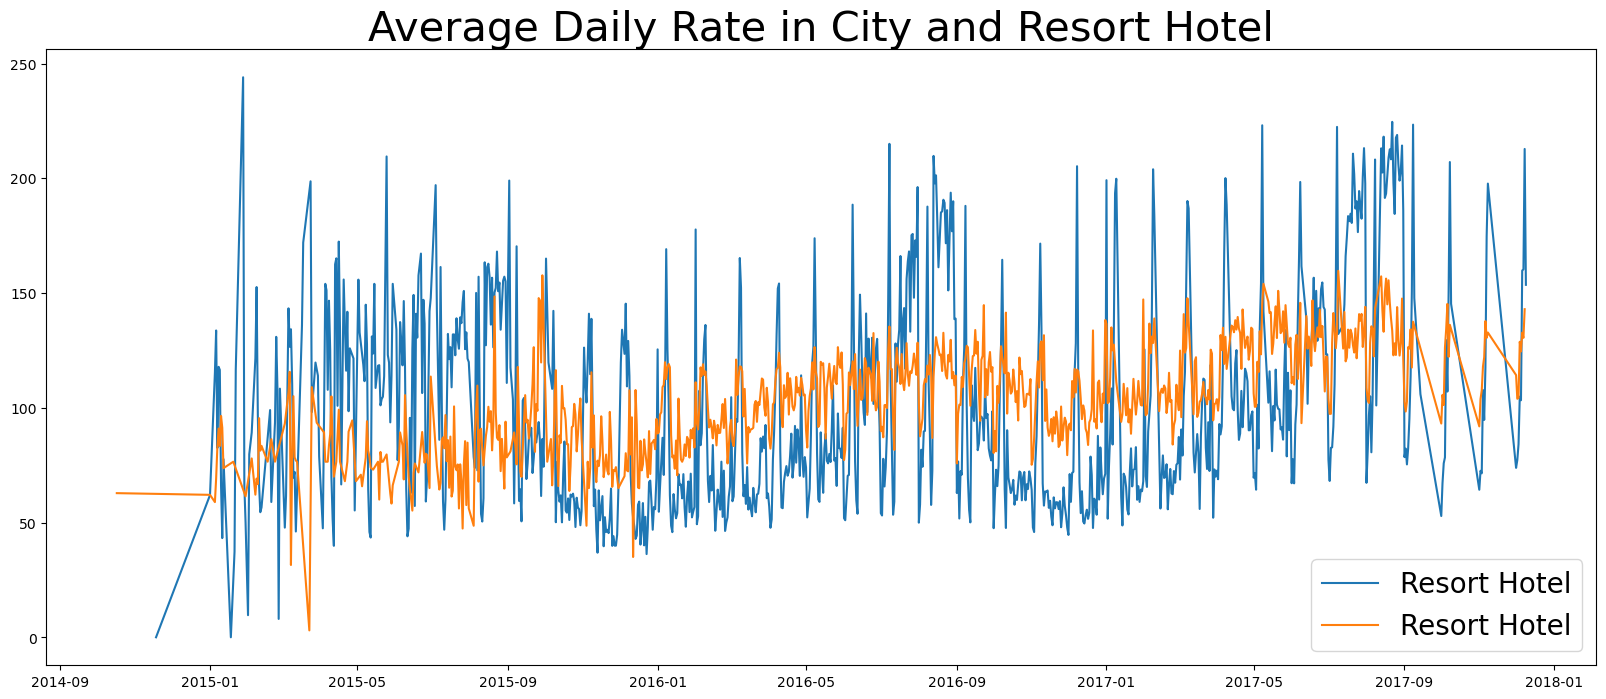

In [89]:
#visulization for average daily rate
plt.figure(figsize = (20, 8))
plt.title("Average Daily Rate in City and Resort Hotel", fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel["adr"], label = "Resort Hotel")
plt.plot(city_hotel.index, city_hotel["adr"], label = "Resort Hotel")
plt.legend(fontsize = 20);

**Here we can see that the price of the resort hotel is high comparitively and those spike might represent that on the weekend or holiday price might get higher**

now we are going to see in which month reservation are high and also cancelation are high

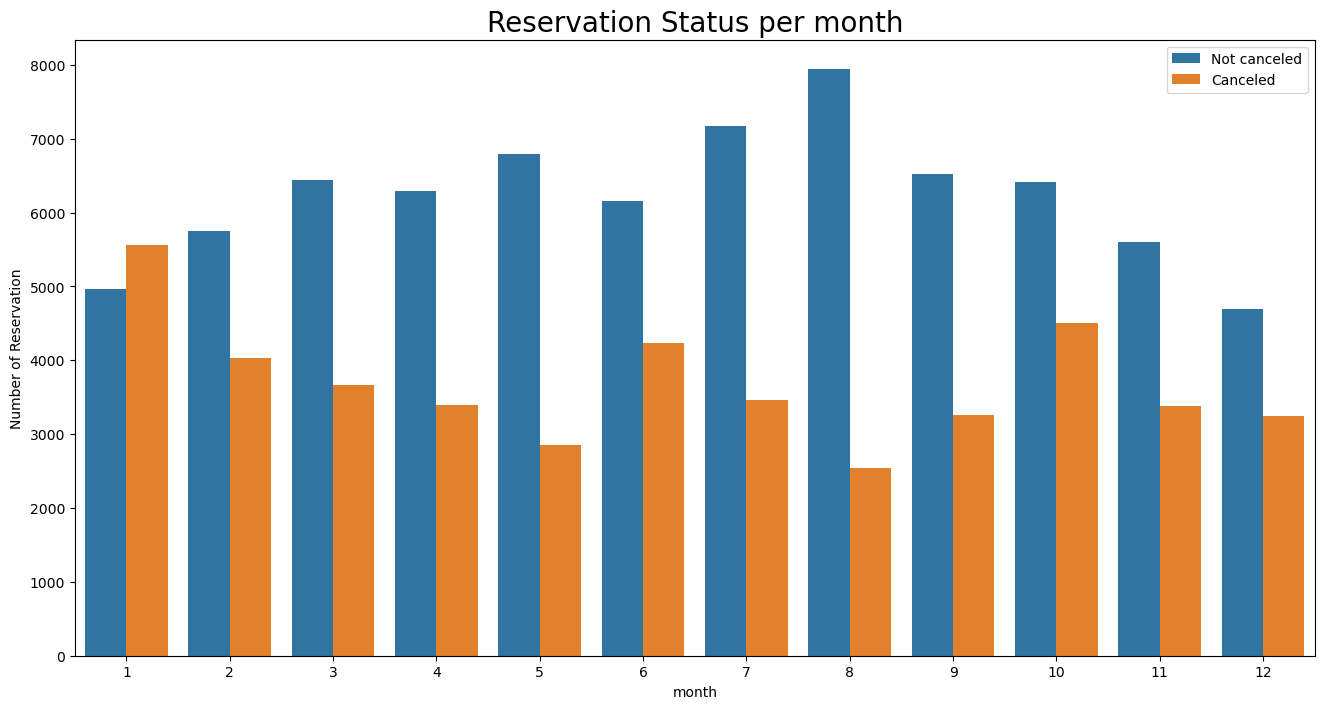

In [90]:
df["month"] = df["reservation_status_date"].dt.month
plt.figure(figsize= (16, 8))
sns.countplot(data = df, x = "month", hue = "is_canceled")
plt.ylabel("Number of Reservation")
plt.title("Reservation Status per month", size = 20)
plt.legend(["Not canceled", "Canceled"]);

**We can see that most of the canceletion occur in January and most of the booking occur in August**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


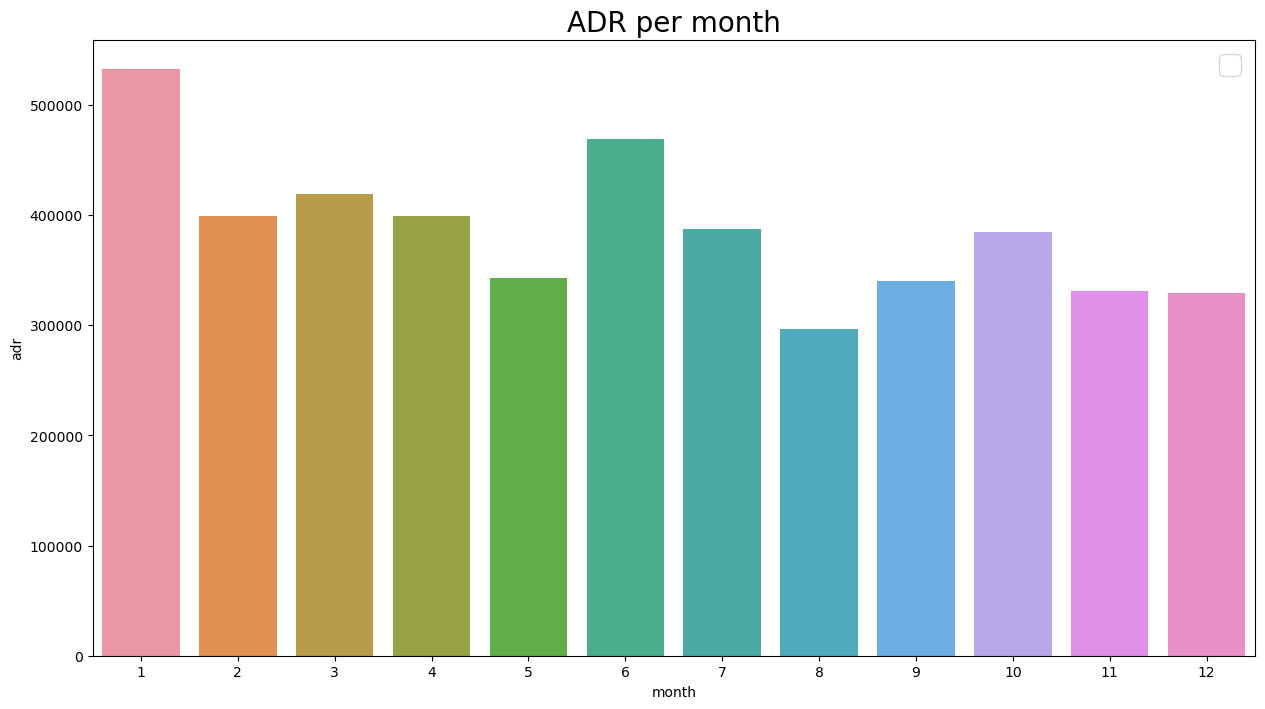

In [91]:
# We have to see price for each month
plt.figure(figsize = (15,8))
sns.barplot(x="month", y="adr", data=df[df["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index())
plt.title("ADR per month", fontsize = 20)
plt.legend(fontsize = 20);

**Here we can see that the prices are higher in January and the prices are lower in the august and due to that the canceletion is higher in the january and lower in the august**

Now we gonna see canceletion on country bases 

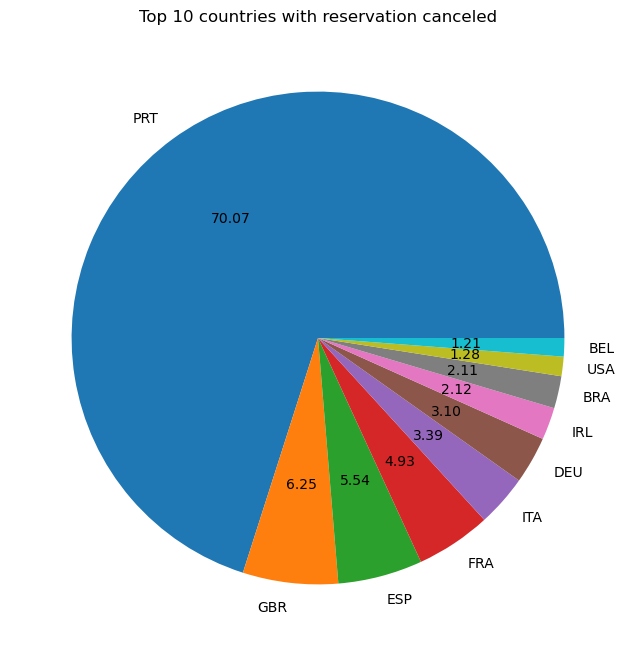

In [92]:
cancelled_data = df[df["is_canceled"] == 1]
country_count = cancelled_data["country"].value_counts()[:10]
plt.figure(figsize = (8, 8))
plt.pie(country_count, autopct= "%.2f", labels= country_count.index)
plt.title("Top 10 countries with reservation canceled");

**Here we can see that most of the hotel cancelation occur in PRT country**

In [93]:
df["market_segment"].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [94]:
df["market_segment"].value_counts(normalize= True)*100

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64

In [95]:
cancelled_data["market_segment"].value_counts(normalize= True)*100

Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64

now let's see which categories of hotel canceletions are high low priced of high priced 

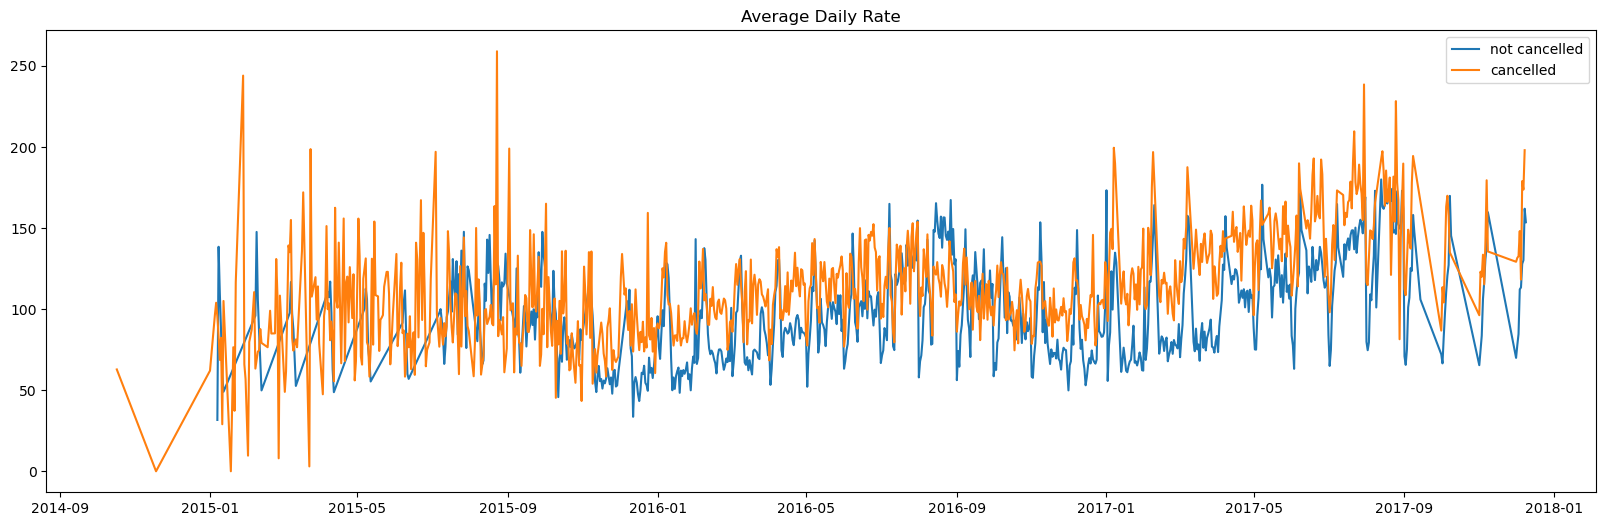

In [102]:
cancelled_df_adr = cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
cancelled_df_adr.reset_index(inplace= True)
cancelled_df_adr.sort_values("reservation_status_date", inplace = True)

not_cancelled_df = df[df["is_canceled"] == 0]
not_cancelled_df_adr = not_cancelled_df.groupby("reservation_status_date")[["adr"]].mean()
not_cancelled_df_adr.reset_index(inplace= True)
not_cancelled_df_adr.sort_values("reservation_status_date", inplace = True)

plt.figure(figsize = (20,6)) 
plt.title("Average Daily Rate")
plt.plot(not_cancelled_df_adr["reservation_status_date"], not_cancelled_df_adr["adr"], label = "not cancelled")
plt.plot(cancelled_df_adr["reservation_status_date"], cancelled_df_adr["adr"], label = "cancelled")
plt.legend()

In [105]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr["reservation_status_date"] > "2016") & (cancelled_df_adr["reservation_status_date"] < "2017")]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr["reservation_status_date"] > "2016") & (not_cancelled_df_adr["reservation_status_date"] < "2017")]

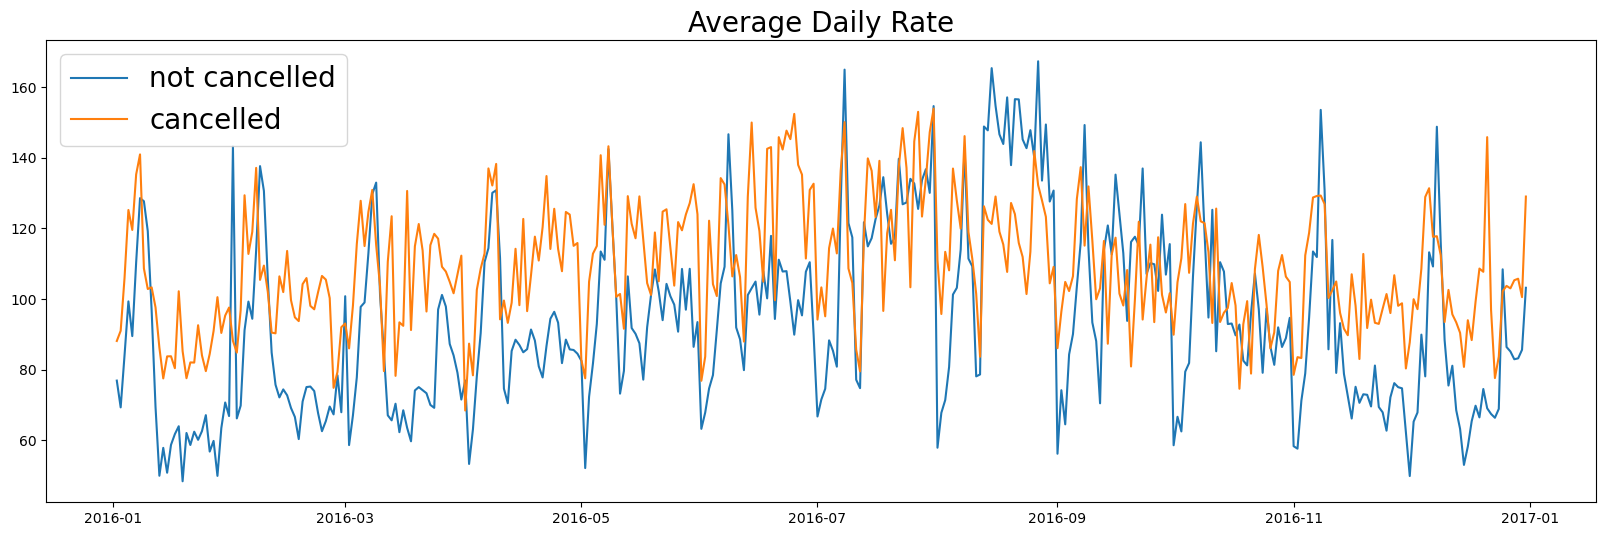

In [108]:
plt.figure(figsize = (20,6)) 
plt.title("Average Daily Rate", fontsize = 20)
plt.plot(not_cancelled_df_adr["reservation_status_date"], not_cancelled_df_adr["adr"], label = "not cancelled")
plt.plot(cancelled_df_adr["reservation_status_date"], cancelled_df_adr["adr"], label = "cancelled")
plt.legend(fontsize = 20);

**As price incrase the canceletion also increase**